## Lectura fitxer

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [2]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [3]:
X = df.drop('target', axis=1)
y = df['target']

## Aplicació model

### Utilització de totes les característiques

In [4]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters)
clusters = model_sc.fit_predict(X)

c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [9]:
df_clustered = X.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,0
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0


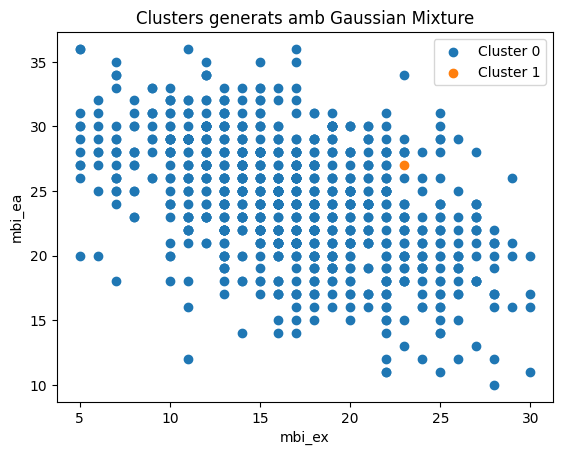

In [10]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points.iloc[:, 14], cluster_points.iloc[:, 16], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [11]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age      year       sex      glang      part       job  \
cluster                                                                 
0        22.388701  3.105085  1.694915  14.241808  0.563842  0.349153   
1        18.000000  1.000000  2.000000  90.000000  0.000000  0.000000   

            stud_h    health      psyt       jspe   qcae_cog  qcae_aff  \
cluster                                                                  
0        25.277966  3.777401  0.224859  106.40339  58.550282  34.79661   
1        35.000000  4.000000  0.000000   81.00000  37.000000  24.00000   

              amsp  erec_mean     mbi_ex     mbi_cy    mbi_ea  
cluster                                                        
0        23.157062   0.719935  16.871186  10.082486  24.20452  
1        17.000000   0.904762  23.000000   7.000000  27.00000  


In [12]:
# Getting the number of patients in each cluster
cluster_grouped.size()

cluster
0    885
1      1
dtype: int64

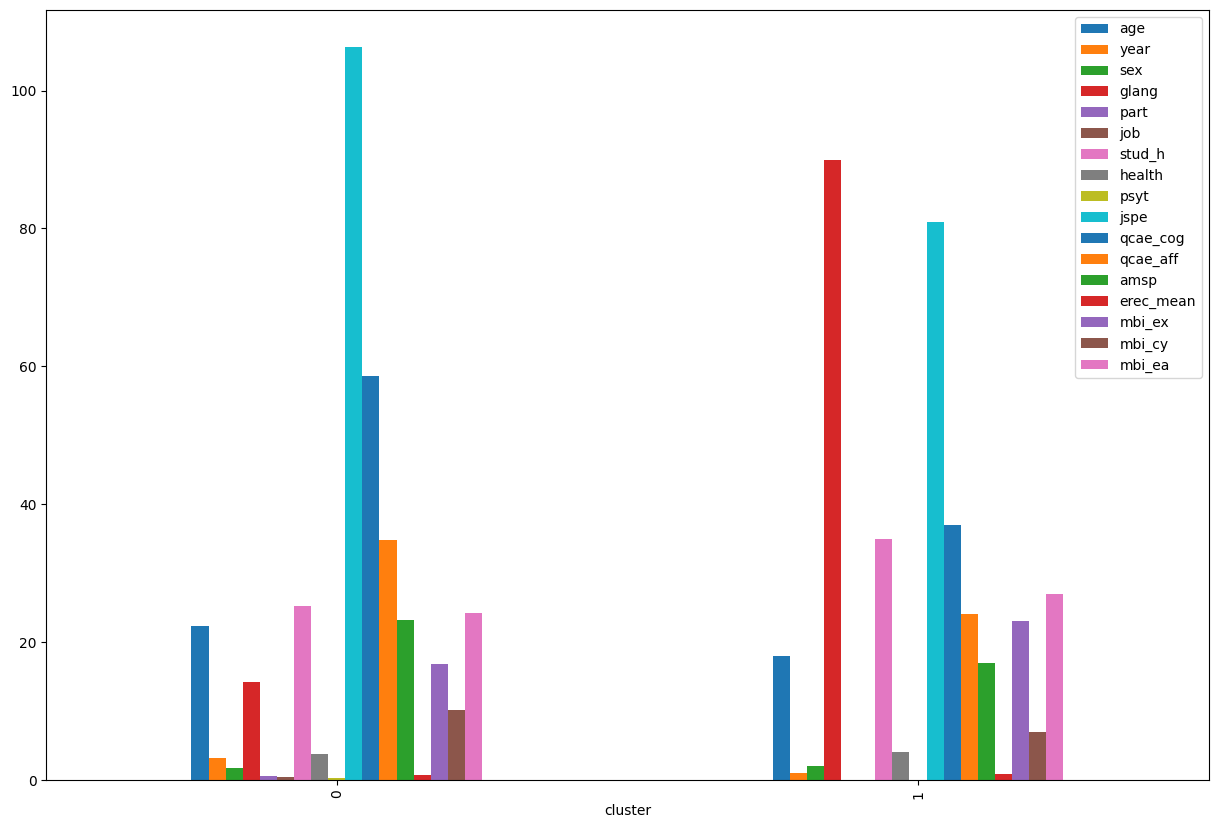

In [13]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

Com podem observar als resultats dels valors mitjans i de la gràfica, no podem concloure cap conclusió clara. Veiem que la columna que més varia d'una gràfica a una altra és la que pertany a la variable glang. Aquesta variable indica la llengua dels estudiants cosa que no considerem significativa.

## Avaluació Model

Definim un threshold per determinar a partir de quin punt considerem que la persona en qüestió pateix una enfermetat mental (ansietat o depressió). Tenint en compte que la nostra y=cesd+stai_t, és a dir la suma de escala de depressió i ansietat. Linterval d'aquestes dues és el següent:

* cesd: 0 - 56
* stai_t: 20 - 77

In [14]:
threshold = (56+77)*0.6
threshold

79.8

In [15]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,0,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,0,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,0,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,0,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,0,91


In [16]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print(count_by_cluster)

cluster
0    178
1      1
dtype: int64


In [17]:
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    885
1      1
dtype: int64

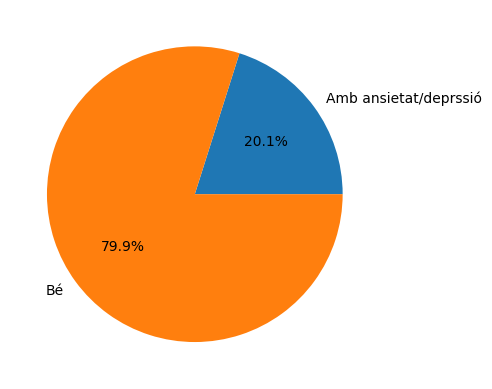

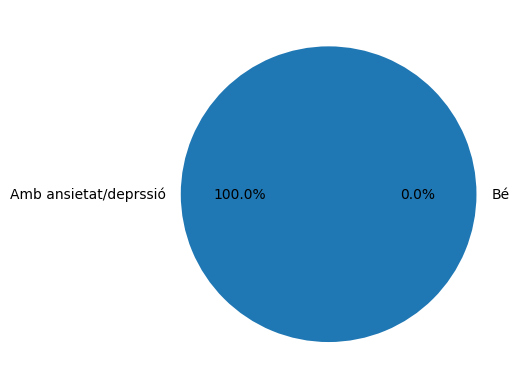

In [19]:
labels = 'Amb ansietat/deprssió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for d in dades:
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    plt.show()